In [1]:
# Imports
import tensorflow as tf
import glob
import os
import matplotlib.pyplot as plt

# Set to TF to GPU
devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(devices[0], True)

In [2]:
#Set up directories for dataset (These were retrived from D: in the GPU lab)

# Test
test_directory = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_test\*.png"))
seg_test_directory = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_seg_test\*.png"))

# Train
train_directory = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_train\*.png"))
seg_train_directory = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_seg_train\*.png"))

# Validation
validation_directory = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_validate\*.png"))
seg_validation_directory = sorted(glob.glob("D:\keras_png_slices_data\keras_png_slices_seg_validate\*.png"))

In [3]:
# Creates datasets, slice tensors, shuffle them.

# Test
test_data = tf.data.Dataset.from_tensor_slices(test_directory)
test_data = test_data.shuffle(len(test_directory))

# Train
train_data = tf.data.Dataset.from_tensor_slices(train_directory)
train_data = test_data.shuffle(len(train_directory))

# Validation
validation_data = tf.data.Dataset.from_tensor_slices(validation_directory)
validation_data = test_data.shuffle(len(validation_directory))                                               
           

In [4]:
# Pre processing and image displaying functions

# Map function

def pre_processing(input):
    
    # Read/output contents of filename
    data = tf.io.read_file(input)
    
    # Convert images to grayscale
    data = tf.image.decode_png(data, channels = 1)
    
    # Resize to 256*256
    data = tf.image.resize(data, (256,256))
    
    # Normalise to (-1,1)
    data = tf.cast(data, tf.float32)
    data = (data - 127.5)/127.5

    return data

# Function to map datasets and set batch sizes

def map_and_batch(input, map_func, batch_size):
    
    input = input.map(map_func).batch(batch_size)
    
    return input


# Functions to display images


# Process single

def show_image(input):
    
    output = plt.figure(dpi = 600, figsize = (8,8))
    
    input_range = range(len(input))
    for i in input_range:
        plt.subplot(3,3, i + 1)
        for j in range(9):
            plt.axis("off")
            plt.imshow(input[i], cmap = "gray")
            
    plt.show()
    

# Process multiple

def show_images(input):
    
    for image in input:
        show_image([tf.squeeze(image)][0])

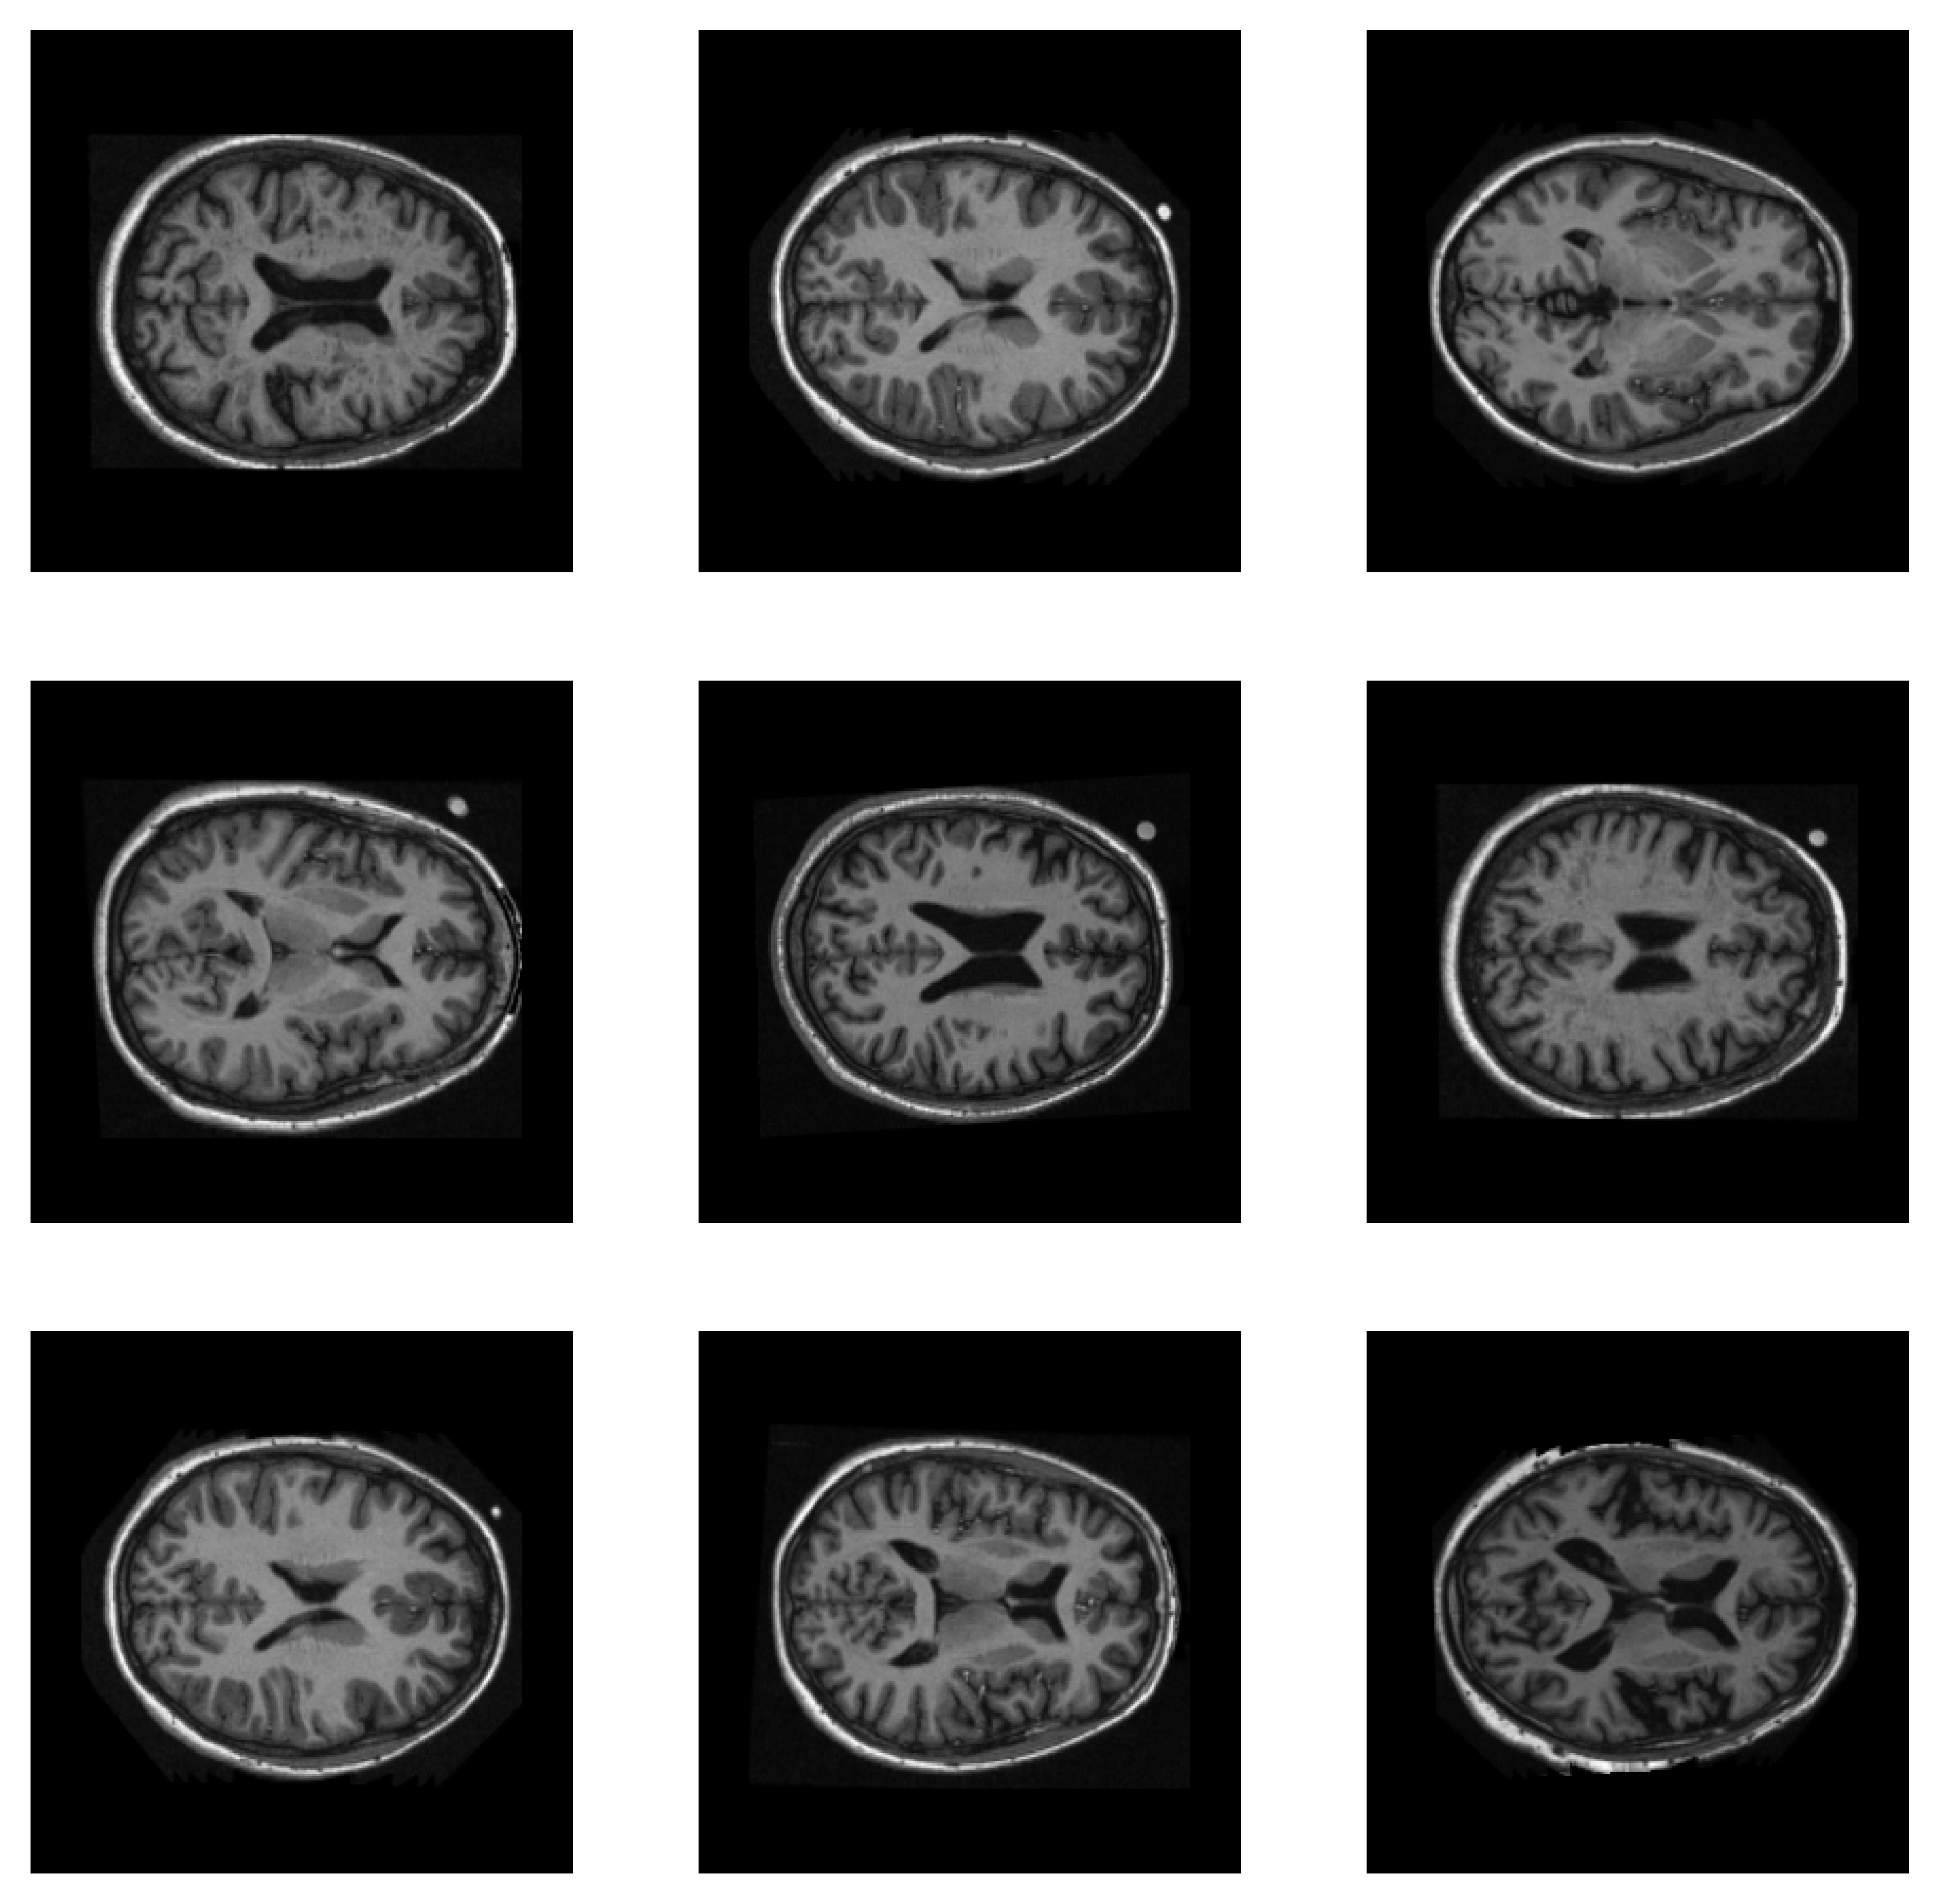

In [5]:
# Apply pre-prcoessing functions to the data

test_data = map_and_batch(test_data, pre_processing, 9)
train_data = map_and_batch(train_data, pre_processing, 9)
validation_data = map_and_batch(validation_data, pre_processing, 9)


# Display the images after processing to see 
# if data processing has been successful

show_images(train_data.take(1))

# 